In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# load lena

lena_im = Image.open('data/lena_gray.bmp')
lena_arr = np.array(lena_im)
lena_arr = lena_arr / 255 # for values to be in the interval [0,1]
lena_vec = lena_arr.flatten()
lena_hist = np.unique(lena_arr, return_counts=True)

In [ ]:
def get_f_from_rep(fhat,m):
    f = np.ones((m,m))
    N = len(fhat)
    for i in range(N):
        for j in range(N):
            ml, mh = i*m//N,(i+1)*m//N
            nl, nh = j*m//N,(j+1)*m//N
            f[ml:mh,nl:nh] *= fhat[i,j]

    return f

In [ ]:
def Lp_mse(f,fhat,p,w):
    return np.sum(np.abs(f - get_f_from_rep(fhat,f.shape[0]))**p*w)

In [ ]:
def Lp_solver(f, w, p, N, eps=0.5, delta=1e-10):
    m,n = f.shape
    fhat = np.ones((N,N))
    wtag = w

    for i in range(N):
        for j in range(N):
            ml, mh = i*m//N,(i+1)*m//N
            nl, nh = j*n//N,(j+1)*n//N
            w_ij = w[ml:mh,nl:nh] 
            f_ij = f[ml:mh,nl:nh]
            wtag_ij = w_ij # unimportant, always gets rewritten 

            def step():
                # get w from prev fhat
                wtag_ij = (np.minimum(1/delta, np.abs(f_ij - fhat[i,j])**(p-2) * w_ij))

                # get new fhat
                old_fhat = fhat[i,j]
                fhat[i,j] = np.sum((f_ij*wtag_ij))/np.sum(wtag_ij)
                return old_fhat
            
            old = step()
            while np.abs(fhat[i,j] - old) > eps:
                old = step()

            wtag[ml:mh,nl:nh] = wtag_ij

    return fhat

In [111]:
def L1_solver(f, w, N):
    m,n = f.shape
    fhat = np.ones((N,N))
    eps = 1e-6

    for i in range(N):
        for j in range(N):
            ml, mh = i*m//N,(i+1)*m//N
            nl, nh = j*n//N,(j+1)*n//N
            fij = f[ml:mh,nl:nh]
            wij = w[ml:mh,nl:nh]

            min_set=False
            for val in np.unique(fij):
                diff = np.abs(np.sum(wij[fij>val]) - np.sum(wij[fij<val]))
                if min_set == False:
                    eps = diff
                    min_set = True

                if diff < eps:
                    fhat[i,j] = val
                    eps = diff

    return fhat

In [ ]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
Y,X = np.meshgrid(x,y)
omega = 2*np.pi / 0.2

f = np.sin(omega * (X**2 + Y**2))
w = np.ones(f.shape)

fhat = Lp_solver(f, w, 2, N=100)

ftag = get_f_from_rep(fhat, f.shape[0])

plt.imshow(f)
plt.show()
plt.imshow(ftag)
plt.show()

216271.44705882357


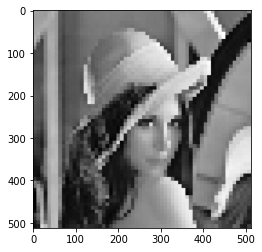

216265.6470588235


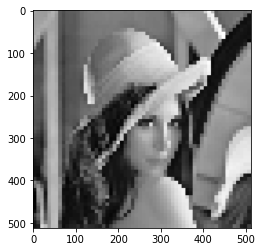

In [129]:
w1 = np.ones(lena_arr.shape)
lena_hat = L1_solver(lena_arr, w1, N=60)
lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
mse = Lp_mse(lena_arr, lena_hat, 1, w)
print(mse)
plt.imshow(lena_tag, cmap='gray')
plt.show()

# lena_hat1 = Lp_solver(lena_arr, w, 1, N=30)
# # lena_hat2 = Lp_solver(lena_arr, w, 2, N=60)
# # lena_hat3 = Lp_solver(lena_arr, w, 2, N=90)
# lena_tag1 = get_f_from_rep(lena_hat1, lena_arr.shape[0])
# # lena_tag2 = get_f_from_rep(lena_hat2, lena_arr.shape[0])
# # lena_tag3 = get_f_from_rep(lena_hat3, lena_arr.shape[0])

# mse1 = Lp_mse(lena_arr, lena_hat1, 1, w)
# print(mse1)
# mse2 = Lp_mse(lena_arr, lena_hat2, 2, w)
# mse3 = Lp_mse(lena_arr, lena_hat3, 2, w)
# print(mse1,mse2,mse3)
# # lena_tag *= 255
# # lena_tag = np.floor(lena_tag).astype('uint8')

# plt.imshow(lena_tag1, cmap='gray')
# plt.show()
# plt.imshow(lena_tag2, cmap='gray')
# plt.show()
# plt.imshow(lena_tag3, cmap='gray')
# plt.show()